[ 8.        8.344828  8.689655  9.034483  9.37931   9.724138 10.068966
 10.413793 10.758621 11.103448 11.448276 11.793103 12.137931 12.482759
 12.827586 13.172414 13.517241 13.862069 14.206897 14.551724 14.896552
 15.241379 15.586207 15.931034 16.275862 16.62069  16.965517 17.310345
 17.655172 18.      ] [-0.035988 -0.074335 -0.10393  -0.121289 -0.124369 -0.112806 -0.087962
 -0.052763 -0.011351  0.031397  0.070448  0.101206  0.120048  0.124757
  0.114777  0.091285  0.057046  0.01609  -0.02676  -0.066459 -0.098334
 -0.118632 -0.124963 -0.116582 -0.094475 -0.061246 -0.020806  0.022084
  0.062374  0.09532 ]
Дисперсія (m=8): 1.006572e-02
[0.01382281 0.01445578 0.01225095 0.0119673  0.01124164 0.01227108
 0.01089218]


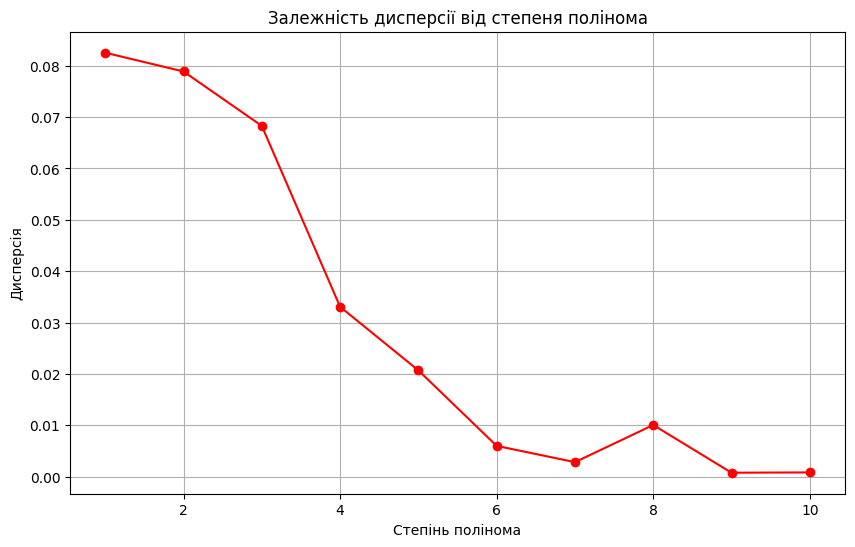

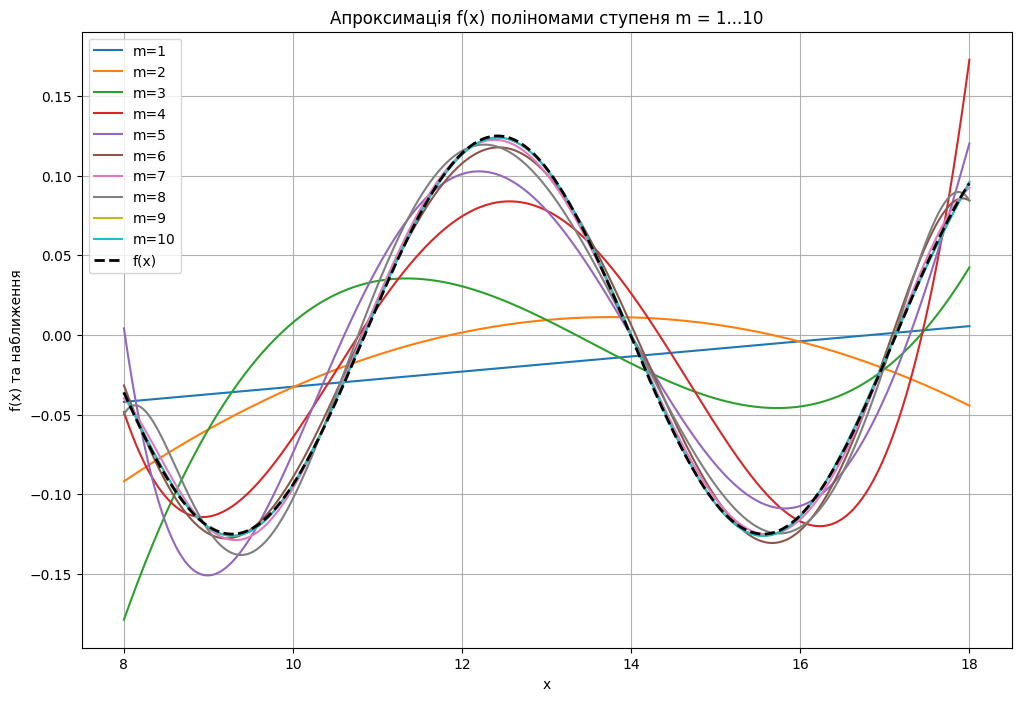

[-1.60459794e+01 -6.56342587e+00  5.92642989e+00 -1.29322545e+00
  1.06804961e-01  2.50489061e-04 -6.13090392e-04  3.66046196e-05
 -4.93688775e-07 -1.97685217e-08  5.25176279e-10]
-----------------
[[3.00000000e+01 3.90000000e+02 5.33724137e+03 7.63324134e+04
  1.13209147e+06 1.72881998e+07 2.70222474e+08 4.30260007e+09
  6.95311130e+10 1.13721551e+12 1.87839313e+13]
 [3.90000000e+02 5.33724137e+03 7.63324134e+04 1.13209147e+06
  1.72881998e+07 2.70222474e+08 4.30260007e+09 6.95311130e+10
  1.13721551e+12 1.87839313e+13 3.12817099e+14]
 [5.33724137e+03 7.63324134e+04 1.13209147e+06 1.72881998e+07
  2.70222474e+08 4.30260007e+09 6.95311130e+10 1.13721551e+12
  1.87839313e+13 3.12817099e+14 5.24559375e+15]
 [7.63324134e+04 1.13209147e+06 1.72881998e+07 2.70222474e+08
  4.30260007e+09 6.95311130e+10 1.13721551e+12 1.87839313e+13
  3.12817099e+14 5.24559375e+15 8.84825287e+16]
 [1.13209147e+06 1.72881998e+07 2.70222474e+08 4.30260007e+09
  6.95311130e+10 1.13721551e+12 1.87839313e+13 3.128

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1 / 8) * np.sin(x + 8)

n = 30
x0, xn = 8, 18
X = np.linspace(x0, xn, n)

F = f(X)

input_file = "input.txt"
np.savetxt(input_file, np.column_stack((X, F)), fmt='%.6f', header='X F', comments='')
X, F = np.loadtxt(input_file, unpack=True, skiprows=1)
print(X,F)
# Реалізація методу Гаусса
def gauss(A, b):
    n = len(b)
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(A[r, i]))
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[i], b[max_row] = b[max_row], b[i]
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]
    return x

# Основна апроксимація для m = 6
m = 8
B = np.zeros((m + 1, m + 1))
C = np.zeros(m + 1)

for k in range(m + 1):
    for j in range(m + 1):
        B[k, j] = np.sum(X**(k + j))
    C[k] = np.sum(F * X**k)

A = gauss(B.copy(), C.copy())


D = np.sqrt(np.sum((f(X) - np.polyval(A[::-1], X))**2) / (n + 1))
print(f"Дисперсія (m=8): {D:.6e}")

x_vals = np.linspace(x0, xn, 7)
y_true = f(x_vals)
y_approx = np.polyval(A[::-1], x_vals)
err = abs(y_true - y_approx)

print(err)

err_file = "errors.txt"
np.savetxt(err_file, np.column_stack((x_vals, err)), fmt='%.6f', header='X Error', comments='')
# Залежність дисперсії від степеня m
dispersions = []
m_values = range(1, 11)

for m in m_values:
    B = np.zeros((m + 1, m + 1))
    C = np.zeros(m + 1)
    for k in range(m + 1):
        for j in range(m + 1):
            B[k, j] = np.sum(X**(k + j))
        C[k] = np.sum(F * X**k)
    A = gauss(B.copy(), C.copy())
    D = np.sqrt(np.sum((f(X) - np.polyval(A[::-1], X))**2) / (n + 1))
    dispersions.append(D)

# Графік дисперсії
plt.figure(figsize=(10, 6))
plt.plot(m_values, dispersions, marker='o', linestyle='-', color='red')
plt.xlabel("Степінь полінома")
plt.ylabel("Дисперсія")
plt.title("Залежність дисперсії від степеня полінома")
plt.grid()
plt.savefig("dispersion_vs_degree.png")
plt.show()

# Апроксимації та похибки на щільній сітці
x_dense = np.linspace(x0, xn, 20 * n)
errors_all = []

plt.figure(figsize=(12, 8))

for m in range(1, 11):
    B = np.zeros((m + 1, m + 1))
    C = np.zeros(m + 1)
    for k in range(m + 1):
        for j in range(m + 1):
            B[k, j] = np.sum(X**(k + j))
        C[k] = np.sum(F * X**k)
    A = gauss(B.copy(), C.copy())
    y_dense_approx = np.polyval(A[::-1], x_dense)
    error = np.abs(f(x_dense) - y_dense_approx)
    errors_all.append(error)
    plt.plot(x_dense, y_dense_approx, label=f"m={m}")

plt.plot(x_dense, f(x_dense), 'k--', label='f(x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x) та наближення')
plt.title('Апроксимація f(x) поліномами ступеня m = 1...10')
plt.legend()
plt.grid()
plt.savefig("approximations_plot.png")
plt.show()

# Збереження помилок на щільній сітці
errors_dense = np.column_stack((x_dense, *errors_all))
header = 'X ' + ' '.join([f'Err_m{m}' for m in range(1, 11)])
np.savetxt("dense_errors.txt", errors_dense, fmt='%.6f', header=header, comments='')

print(A)
print('-----------------')
print(B)
print('-----------------')
print(C)
print(x_dense)